# Investigating Correlations of Life Expectancy against Work Hours, Happiness, and Government Democracy Levels

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset being invested is Gapminder World's dataset. The main question is whether there is correlation between life expectancy (the dependent variable) and work hours, happiness, and democracy score (the independent variables).

From the dataset, four files have been downloaded for each of the variables. From the given files, only numbers for years 2005-2011 will be used for the analysis of this question. 

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted

import pandas as pd
import numpy as np
import matplotlib as mt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

tl= pd.read_csv('life_expectancy_years.csv') 
tw= pd.read_csv('working_hours_per_week.csv')
th= pd.read_csv('hapiscore_whr.csv')
td= pd.read_csv('democracy_score_use_as_color.csv')

td.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


As explained in the intro as to only analyze a set period of time, I will be analyzing data from the years 2005-2011. The years were chosen to reflect more recent years due the likelihood of more accurate data compared to data from decades ago. Additionally, the year range was determined by data being available in all files. In this case, the Happiness Score data only goes as far back as 2005, while the Democracy Score data only goes up to 2011.

From the original tables, I will extract the year columns that correpond to those years.

**(See Below)**

In [3]:
column_list = ['country', '2005', '2006', '2007', '2008', '2009', '2010', '2011']

tlex = tl[column_list]
twex = tw[column_list]
thex = th[column_list]
tdex = td[column_list]

tdex.head(1)

,country,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(tlex.info())
print(twex.info())
print(thex.info())
print(tdex.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   2005     187 non-null    float64
 2   2006     187 non-null    float64
 3   2007     187 non-null    float64
 4   2008     187 non-null    float64
 5   2009     187 non-null    float64
 6   2010     187 non-null    float64
 7   2011     187 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  126 non-null    object 
 1   2005     59 non-null     float64
 2   2006     62 non-null     float64
 3   2007     60 non-null     float64
 4   2008     60 non-null     float64
 5   2009     78 non-null     float64
 6   2010     85 non-null     float64
 7   2011   

### Data Cleaning

From the ```info()``` functions, data sets **tw**, **th**, and **td** have null values. These correspond to the **work hours**, **happiness scores**, and **democracy score** data sets. 

For the **work hours** and the **happiness score** tables, it appears there are individual cells that need filling, but also full rows. Where individual cells need filling, it seems that the best way to fill those cells is by doing a row mean instead of a colum mean as numbers vary much more between countries than between years. To address the missing rows of information, a column mean can be used.

For the **democracy score**, it appears that some countries are missing whole rows of information. In this case, I will be using a column mean to fill those in.

In [5]:
# Fill NA in Work Hours Table by row mean

twexmean=twex.mean(axis=1)
twextrans=twex.T
twextrans.fillna(twexmean.T, inplace = True)
twex=twextrans.T

# Restore column data type after datatype loss due to transpose

col = ['2005', '2006', '2007', '2008', '2009', '2010', '2011']
for columns in col:
    twex[columns]=twex.loc[:,columns].astype(float)

# Fill NA in Work Hours Table by column mean

twex.fillna(twex.mean(axis=0), inplace=True)

In [6]:
# Fill in NA in Happiness Score Table by row mean 
thexmean=thex.mean(axis=1)
thextrans=thex.T
thextrans.fillna(thexmean.T, inplace = True)
thex=thextrans.T

#Restoring data type for columns after datatype loss due to transpose

col = ['2005', '2006', '2007', '2008', '2009', '2010', '2011']
for columns in col:
    thex[columns]=thex.loc[:,columns].astype(float)

# Fill NA in Happiness Score Table by column mean

thex.fillna(thex.mean(axis=0), inplace=True)

In [7]:
# Fill in NA in Democracy Score table by column mean

tdex.fillna(tdex.mean(),inplace=True)

C:\Users\kevgw\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [8]:
# Check NA values are all filled in

print(tlex.info())
print(twex.info())
print(thex.info())
print(tdex.info())

# Check no duplicates exist

print(sum(tlex.duplicated()))
print(sum(twex.duplicated()))
print(sum(thex.duplicated()))
print(sum(tdex.duplicated()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   2005     187 non-null    float64
 2   2006     187 non-null    float64
 3   2007     187 non-null    float64
 4   2008     187 non-null    float64
 5   2009     187 non-null    float64
 6   2010     187 non-null    float64
 7   2011     187 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  126 non-null    object 
 1   2005     126 non-null    float64
 2   2006     126 non-null    float64
 3   2007     126 non-null    float64
 4   2008     126 non-null    float64
 5   2009     126 non-null    float64
 6   2010     126 non-null    float64
 7   2011   

Now that all the tables have been cleaned, we will merge the tables into one big data set. To do this, columns need to be re-named so they do not have the same year columns. 

In [9]:
#Column Renaming
colnameslife = ['country_le','2005_le', '2006_le', '2007_le', '2008_le', '2009_le', '2010_le', '2011_le']
colnameswork = ['country_wh','2005_wh', '2006_wh', '2007_wh', '2008_wh', '2009_wh', '2010_wh', '2011_wh']
colnameshappy = ['country_hs','2005_hs', '2006_hs', '2007_hs', '2008_hs', '2009_hs', '2010_hs', '2011_hs']
colnamesdemo = ['country_ds','2005_ds', '2006_ds', '2007_ds', '2008_ds', '2009_ds', '2010_ds', '2011_ds']

tlex.columns = colnameslife
twex.columns = colnameswork
thex.columns = colnameshappy
tdex.columns = colnamesdemo

Now that all columns have been renamed, the data can all be merged into a Data Frame called **df**. 

The data has been merged as a inner join to ensure the countries that remain have full data. It appears that some data sets do not have information for particular countries and so these are just dropped to leave only countries with data or countries whose data was filled previously.

In [10]:
df = tlex.merge(twex, left_on='country_le', right_on='country_wh', how='inner')
df = df.merge(thex, left_on='country_le', right_on='country_hs', how='inner')
df = df.merge(tdex, left_on='country_le', right_on='country_ds', how='inner')

In [11]:
df.info()
df.tail(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country_le  116 non-null    object 
 1   2005_le     116 non-null    float64
 2   2006_le     116 non-null    float64
 3   2007_le     116 non-null    float64
 4   2008_le     116 non-null    float64
 5   2009_le     116 non-null    float64
 6   2010_le     116 non-null    float64
 7   2011_le     116 non-null    float64
 8   country_wh  116 non-null    object 
 9   2005_wh     116 non-null    float64
 10  2006_wh     116 non-null    float64
 11  2007_wh     116 non-null    float64
 12  2008_wh     116 non-null    float64
 13  2009_wh     116 non-null    float64
 14  2010_wh     116 non-null    float64
 15  2011_wh     116 non-null    float64
 16  country_hs  116 non-null    object 
 17  2005_hs     116 non-null    float64
 18  2006_hs     116 non-null    float64
 19  2007_hs     116 non-null    f

,country_le,2005_le,2006_le,2007_le,2008_le,2009_le,2010_le,2011_le,country_wh,2005_wh,...,2010_hs,2011_hs,country_ds,2005_ds,2006_ds,2007_ds,2008_ds,2009_ds,2010_ds,2011_ds
111,Uruguay,75.5,76.0,75.5,76.1,76.4,76.4,76.3,Uruguay,41.072298,...,0.606,0.655,Uruguay,10.0,10.0,10.0,10.0,10.0,10.0,10.0
112,Venezuela,75.2,75.2,75.0,74.7,74.8,75.3,75.3,Venezuela,40.000000,...,0.748,0.658,Venezuela,6.0,5.0,5.0,5.0,-3.0,-3.0,-3.0
113,Vietnam,72.5,72.7,72.8,73.0,73.2,73.5,73.6,Vietnam,43.575000,...,0.530,0.577,Vietnam,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
114,Yemen,65.9,66.4,66.8,67.2,67.5,68.0,68.1,Yemen,42.000000,...,0.435,0.375,Yemen,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
115,Zimbabwe,45.1,45.4,45.9,46.3,47.2,49.7,52.4,Zimbabwe,41.072298,...,0.468,0.485,Zimbabwe,-4.0,-4.0,-4.0,-4.0,1.0,1.0,1.0


Checking the data, Data Frame **df** appears to have 116 rows left and country data has been properly lined up.

To help with Data Analysis, the mean for each attribute is calculated for each country. 

In [12]:
le_col=df.loc[:,'2005_le':'2011_le']
df['mean_le'] = le_col.mean(axis=1)

wh_col=df.loc[:,'2005_wh':'2011_wh']
df['mean_wh'] = wh_col.mean(axis=1)

hs_col=df.loc[:,'2005_hs':'2011_hs']
df['mean_hs'] = hs_col.mean(axis=1)

ds_col=df.loc[:,'2005_ds':'2011_ds']
df['mean_ds'] = ds_col.mean(axis=1)

df.iloc[:,[32,33,34,35]].describe()

,mean_le,mean_wh,mean_hs,mean_ds
count,116.000000,116.000000,116.000000,116.000000
mean,71.755542,40.604866,0.556101,5.140455
std,8.137730,4.185334,0.106313,5.737143
min,47.428571,24.000000,0.362333,-10.000000
25%,67.375000,39.014286,0.480375,2.107143
50%,74.135714,40.635774,0.540639,8.000000
75%,78.150000,42.800000,0.640750,9.892857
max,82.814286,52.600000,0.784333,10.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Which country has the highest Life Expectancy? Looking at their Work Hours, Happiness Score, and Democracy Score, do these appear lower or higher?

To answer this question, I have made a smaller data set with rows for the 10 countries with the highest life expectancies. From there, I have picked the country with the highest life expectancy and called out the row's mean values to analyze below.

In [13]:
barplotdata = df.nlargest(10,'mean_le')

Text(0, 0.5, 'Life Expectancy (yrs)')

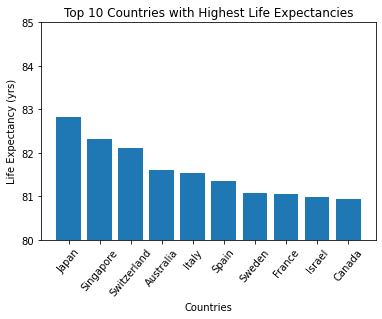

In [14]:
mt.pyplot.bar(barplotdata['country_le'],barplotdata['mean_le'])
mt.pyplot.ylim(ymin=80, ymax=85)
mt.pyplot.xticks(barplotdata['country_le'], barplotdata['country_le'], rotation=50)
mt.pyplot.title('Top 10 Countries with Highest Life Expectancies')
mt.pyplot.xlabel('Countries')
mt.pyplot.ylabel('Life Expectancy (yrs)')

In [15]:
df[df['mean_le']==df['mean_le'].max()].iloc[:,[0,32,33,34,35]]

,country_le,mean_le,mean_wh,mean_hs,mean_ds
51,Japan,82.814286,40.25,0.613833,10.0


**ANSWER:**

The country with the highest life expectancy is **Japan** with 82.81 years followed by Singapore. 

For Japan, the **Democracy Score** is at the max possible value (10), while the **Work Hours** (40.25) is slightly below the median (40.6) and the **Happiness Score** (0.61) is slightly above the median (0.54).

Looking at this information, it seems that there might be a relationship between Life Expectancy and Democracy Score & Happiness Score.

### Question 2: Is there a relationship between Life Expectancy and Work Hours?

To answer this question, I have created a scatter plot with both variables to see if there is a trend.

Text(0, 0.5, 'Life Expectancy (yrs)')

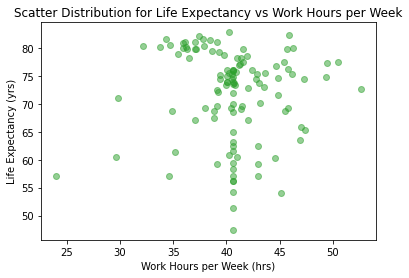

In [16]:
mt.pyplot.scatter(df['mean_wh'],df['mean_le'],c='#2ca02c', alpha=0.5, edgecolors='face')
mt.pyplot.title('Scatter Distribution for Life Expectancy vs Work Hours per Week')
mt.pyplot.xlabel('Work Hours per Week (hrs)')
mt.pyplot.ylabel('Life Expectancy (yrs)')

**ANSWER:**

Based on the scatter plot, the distribution does not seem to point towards a specific relation between Life Expectancy and Work Hours.

### Question 3: Is there a relationship between Life Expectancy and Happiness Score?

To answer this question, I have created a scatter plot with both variables to see if there is a trend.

Text(0, 0.5, 'Life Expectancy (yrs)')

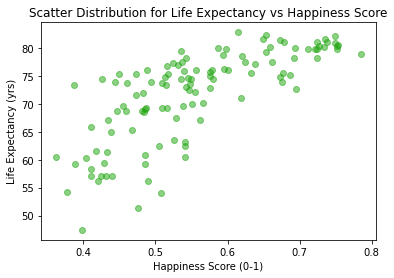

In [17]:
mt.pyplot.scatter(df['mean_hs'],df['mean_le'],c='#1da50d', alpha=0.5, edgecolors='face')
mt.pyplot.title('Scatter Distribution for Life Expectancy vs Happiness Score')
mt.pyplot.xlabel('Happiness Score (0-1)')
mt.pyplot.ylabel('Life Expectancy (yrs)')

**ANSWER:**

Based on the scatter plot, the distribution seems point towards a positive correlation between Life Expectancy and Happiness Score.

### Question 4: Is there a relationship between Life Expectancy and Democracy Score?

To answer this question, I have created a scatter plot with both variables to see if there is a trend.

**ANSWER:**

Based on the scatter plot, the distribution seems point towards a positive correlation between Life Expectancy and Democracy Score.

Text(0, 0.5, 'Life Expectancy (yrs)')

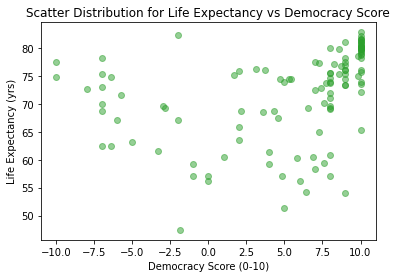

In [18]:
mt.pyplot.scatter(df['mean_ds'],df['mean_le'],c='#2ca02c', alpha=0.5, edgecolors='face')
mt.pyplot.title('Scatter Distribution for Life Expectancy vs Democracy Score')
mt.pyplot.xlabel('Democracy Score (0-10)')
mt.pyplot.ylabel('Life Expectancy (yrs)')

### Question 5 (EXTRA): What is the distribution of Life Expectancy for all countries?

To address the single-variable analysis, I am looking to see if there is a specific distribution (e.g. normal) for life expectancy based on the dataset. To do this, a histogram will be plotted based on the mean for each country.

Text(0.5, 0, 'Life Expectancy (yrs)')

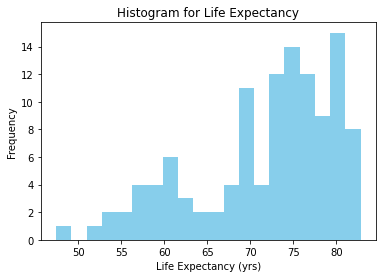

In [19]:
df['mean_le'].plot.hist(bins=20, color = 'skyblue')
mt.pyplot.title('Histogram for Life Expectancy')
mt.pyplot.xlabel('Life Expectancy (yrs)')

**ANSWER:**

Life Expectancy appears to be left skewed as shown above.



<a id='conclusions'></a>
## Conclusions


From our questions, we have determined that Japan has the highest life expectancy. 

Life Expectancy appears to be positively correlated with a higher Democracy Score and a higher Happiness Score. This relationship is most telling in the Happiness Score scatter plot. Life Expectancy does not seem to be correlated with work hours.

It should be noted that other factors come into play and as such it can't be said from this analysis that higher democracy scores and higher happiness scores lead to higher life expectancy. For instance, it is possible that countries with higher democracy scores are also wealthy countries, which offer quality healthcare services to their citizens leading to higher life expectancies. In that case, it isn't necessarily the democracy score that leads to higher life expectancy but access to quality healthcare.